In [411]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as LA

In [325]:
#Define Va function
def calculate_va_i(angles,speeds,nparticles):
    vx = np.inner(np.cos(angles),speeds)
    vy = np.inner(np.sin(angles),speeds)
    return LA.norm([vx,vy])/(nparticles*aux_speeds[0])

In [326]:
N = [10, 25, 50, 100, 250, 500, 1000, 1500]
L = 10
noises = [0.0, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
num_files = list(noises)

In [327]:
w_data_files = []
datas = []
for n in N:
    data_files = []
    for num_file in num_files:
        data_files.append(pd.read_csv(f'../src/main/resources/output/parameters/output_N_{n}_L_{L}_n_{num_file}.csv'))
    w_data_files.append(data_files)
    datas.append(data_files[0])
w_data_files

[[       iteration  id         x         y  speed     angle
  0              0   1  6.438356  0.930560   0.03  0.998707
  1              0   2  8.500804  4.002722   0.03  3.038505
  2              0   3  2.887519  3.330668   0.03  1.709610
  3              0   4  9.321854  0.835379   0.03  3.825156
  4              0   5  7.082795  3.534241   0.03  6.085149
  ...          ...  ..       ...       ...    ...       ...
  19995       1999   6  2.952684  2.265000   0.03 -0.979741
  19996       1999   7  3.873630  3.534435   0.03 -0.979741
  19997       1999   8  2.092698  5.254372   0.03 -0.979741
  19998       1999   9  2.601343  4.474193   0.03 -0.979741
  19999       1999  10  3.030968  3.902545   0.03 -0.979741
  
  [20000 rows x 6 columns],
         iteration  id         x         y  speed     angle
  0              0   1  2.423631  1.577594   0.03  2.513314
  1              0   2  5.782500  1.577756   0.03  3.728468
  2              0   3  0.207139  1.300955   0.03  1.190862
  3      

In [328]:
# Create important variables
n_particles = []
aux_speeds = []
for data in datas:
    n_particles.append(data['id'].max())
    aux_speeds.append(data.loc[0]['speed'])
print(n_particles)
print(aux_speeds)

[10, 25, 50, 100, 250, 500, 1000, 1500]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]


In [329]:
w_list_final_data = []
for data_files in w_data_files:
    list_final_data = []
    for i,file in enumerate(data_files):
        aux = file.groupby('iteration').apply(lambda x: calculate_va_i(x['angle'],x['speed'],x['id'].max())).reset_index()
        rename_dict = {'iteration': 'time', 0: f'n={num_files[i]}'}
        aux = aux.rename(columns=rename_dict)
        list_final_data.append(aux)
    w_list_final_data.append(list_final_data)
w_list_final_data

[[      time     n=0.0
  0        0  0.355797
  1        1  0.355797
  2        2  0.365181
  3        3  0.365181
  4        4  0.365181
  ...    ...       ...
  1995  1995  1.000000
  1996  1996  1.000000
  1997  1997  1.000000
  1998  1998  1.000000
  1999  1999  1.000000
  
  [2000 rows x 2 columns],
        time     n=0.1
  0        0  0.225510
  1        1  0.207944
  2        2  0.224499
  3        3  0.230340
  4        4  0.220152
  ...    ...       ...
  1995  1995  0.980532
  1996  1996  0.976812
  1997  1997  0.981601
  1998  1998  0.978040
  1999  1999  0.973366
  
  [2000 rows x 2 columns],
        time     n=0.5
  0        0  0.298800
  1        1  0.257682
  2        2  0.291788
  3        3  0.268190
  4        4  0.220325
  ...    ...       ...
  1995  1995  0.870409
  1996  1996  0.857826
  1997  1997  0.873882
  1998  1998  0.873889
  1999  1999  0.858427
  
  [2000 rows x 2 columns],
        time     n=1.0
  0        0  0.230058
  1        1  0.214082
  2        2 

In [330]:
w_final_df = []
for list_final_data in w_list_final_data:
    aux = list_final_data.pop(0)
    w_final_df.append(aux)
num_files.pop(0)

0.0

In [331]:
print(len(w_list_final_data))
print((len(w_final_df)))

8
8


In [332]:
for j,list_final_data in enumerate(w_list_final_data):
    for i,elem in enumerate(list_final_data):
        w_final_df[j] = w_final_df[j].join(elem[f'n={num_files[i]}'])
    # w_list_final_data.append(w_final_df[j])
w_final_df_csv = w_final_df

In [333]:
for i,final_df in enumerate(w_final_df):
    final_df.to_csv(f"./resources/observable_t_N_{N[i]}_L{L}.csv")

In [334]:
w_final_df

[      time     n=0.0     n=0.1     n=0.5     n=1.0     n=1.5     n=2.0  \
 0        0  0.355797  0.225510  0.298800  0.230058  0.190393  0.349575   
 1        1  0.355797  0.207944  0.257682  0.214082  0.118577  0.159316   
 2        2  0.365181  0.224499  0.291788  0.370200  0.147015  0.110772   
 3        3  0.365181  0.230340  0.268190  0.370140  0.090811  0.140514   
 4        4  0.365181  0.220152  0.220325  0.312026  0.180055  0.184642   
 ...    ...       ...       ...       ...       ...       ...       ...   
 1995  1995  1.000000  0.980532  0.870409  0.855841  0.823518  0.397789   
 1996  1996  1.000000  0.976812  0.857826  0.803137  0.778351  0.254469   
 1997  1997  1.000000  0.981601  0.873882  0.795501  0.820959  0.320195   
 1998  1998  1.000000  0.978040  0.873889  0.816895  0.697357  0.319600   
 1999  1999  1.000000  0.973366  0.858427  0.779737  0.561045  0.577415   
 
          n=3.0     n=4.0     n=5.0  
 0     0.602347  0.352975  0.314018  
 1     0.355841  0.319

In [335]:
density_w_final_df = w_final_df

In [336]:
mean_list = []
aux_num_files = list(noises)
for final_df in w_final_df:
    aux_mean_list = []
    for n in aux_num_files:
        aux_mean_list.append(final_df[f'n={n}'].loc[300:].mean())
    mean_list.append(aux_mean_list)
mean_list

[[0.8028054458148082,
  0.9834774809799876,
  0.7118589229352542,
  0.7228855330940152,
  0.5484005083810628,
  0.3543109657885281,
  0.3519069876069047,
  0.2931227372260504,
  0.2838105403531131],
 [0.9999460286118261,
  0.9844098029815248,
  0.9509051014177082,
  0.6682839285271217,
  0.6604327917080592,
  0.4554359626248685,
  0.28203356681599623,
  0.20204962826535786,
  0.1825837090724847],
 [0.9999999850078444,
  0.9974921092703626,
  0.9016722253261792,
  0.8350257796747375,
  0.653526880203937,
  0.5470107332358575,
  0.24624953356768675,
  0.15416299222331442,
  0.12958225031125292],
 [0.9999971041451395,
  0.9993853027705155,
  0.9664630783644864,
  0.903553237613784,
  0.7482387878042583,
  0.6332542932312268,
  0.3143579623025099,
  0.15311186435008756,
  0.09970728242474694],
 [0.9999111674125982,
  0.9992596185577393,
  0.9809043028694203,
  0.934517382213912,
  0.8461768871919653,
  0.7576335336837233,
  0.391909379984352,
  0.1683094550586962,
  0.06905457534075247],
 

In [337]:
aux = []
for i in N:
    aux.append(f'N={i}')
print(aux)
col = ["noise"]
col.extend(aux)
print(col)

['N=10', 'N=25', 'N=50', 'N=100', 'N=250', 'N=500', 'N=1000', 'N=1500']
['noise', 'N=10', 'N=25', 'N=50', 'N=100', 'N=250', 'N=500', 'N=1000', 'N=1500']


In [338]:
mean_df = pd.DataFrame(columns=col)
mean_df["noise"] = noises
for i,key in enumerate(aux):
    print(key)
    mean_df[key] = mean_list[i]
mean_df

N=10
N=25
N=50
N=100
N=250
N=500
N=1000
N=1500


,noise,N=10,N=25,N=50,N=100,N=250,N=500,N=1000,N=1500
0,0.0,0.802805,0.999946,1.000000,0.999997,0.999911,1.000000,1.000000,1.000000
1,0.1,0.983477,0.984410,0.997492,0.999385,0.999260,0.999498,0.999548,0.999561
2,0.5,0.711859,0.950905,0.901672,0.966463,0.980904,0.986718,0.988497,0.988793
3,1.0,0.722886,0.668284,0.835026,0.903553,0.934517,0.947975,0.955096,0.956290
4,1.5,0.548401,0.660433,0.653527,0.748239,0.846177,0.884922,0.897909,0.902390
5,2.0,0.354311,0.455436,0.547011,0.633254,0.757634,0.801567,0.825530,0.830443
6,3.0,0.351907,0.282034,0.246250,0.314358,0.391909,0.581413,0.628331,0.638956
7,4.0,0.293123,0.202050,0.154163,0.153112,0.168309,0.293807,0.380359,0.407147
8,5.0,0.283811,0.182584,0.129582,0.099707,0.069055,0.064354,0.080931,0.119296


In [372]:
mean_density_df = mean_df.T
mean_density_df.columns = [f'n={i}' for i in mean_density_df.values[0]]
mean_density_df.drop(index="noise", axis=0, inplace=True)
mean_density_df

,n=0.0,n=0.1,n=0.5,n=1.0,n=1.5,n=2.0,n=3.0,n=4.0,n=5.0
N=10,0.802805,0.983477,0.711859,0.722886,0.548401,0.354311,0.351907,0.293123,0.283811
N=25,0.999946,0.984410,0.950905,0.668284,0.660433,0.455436,0.282034,0.202050,0.182584
N=50,1.000000,0.997492,0.901672,0.835026,0.653527,0.547011,0.246250,0.154163,0.129582
N=100,0.999997,0.999385,0.966463,0.903553,0.748239,0.633254,0.314358,0.153112,0.099707
N=250,0.999911,0.999260,0.980904,0.934517,0.846177,0.757634,0.391909,0.168309,0.069055
N=500,1.000000,0.999498,0.986718,0.947975,0.884922,0.801567,0.581413,0.293807,0.064354
N=1000,1.000000,0.999548,0.988497,0.955096,0.897909,0.825530,0.628331,0.380359,0.080931
N=1500,1.000000,0.999561,0.988793,0.956290,0.902390,0.830443,0.638956,0.407147,0.119296


In [373]:
mean_df.to_csv(f"./resources/observable_n_N_{N}_L{L}.csv",index=False)

In [377]:
mean_density_df.to_csv(f"./resources/observable_n={noises}_N_{N}_L{L}.csv")

In [341]:
final_density_df = pd.DataFrame(columns=["noise","va","density"])
density = [i/(L**2) for i in N]
final_density_df["density"] = list(density) * len(mean_density_df.values)
aux = list(mean_density_df["noise"].values) * len(N)
aux.sort()
final_density_df["noise"] = aux
m = mean_density_df.drop(columns="noise",axis=1)
final_density_df["va"] = m.values.reshape(len(m.values)*len(N),-1)
final_density_df

,noise,va,density
0,0.0,0.802805,0.10
1,0.0,0.999946,0.25
2,0.0,1.000000,0.50
3,0.0,0.999997,1.00
4,0.0,0.999911,2.50
...,...,...,...
67,5.0,0.099707,1.00
68,5.0,0.069055,2.50
69,5.0,0.064354,5.00
70,5.0,0.080931,10.00


In [375]:
final_density_df.to_csv(f"./resources/observable_n={noises}_N_{N}_L{L}.csv",index=False)

In [395]:
w_list_final_data = []
num_files = list(noises)

In [396]:
for data_files in w_data_files:
    list_final_data = []
    for i,file in enumerate(data_files):
        aux = file.groupby('iteration').apply(lambda x: calculate_va_i(x['angle'],x['speed'],x['id'].max())).reset_index()
        rename_dict = {'iteration': 'time', 0: f'va'}
        aux = aux.rename(columns=rename_dict)
        aux['noise'] = [f"n={num_files[i]}"] * len(aux)
        list_final_data.append(aux)
    w_list_final_data.append(list_final_data)
w_list_final_data

[[      time        va  noise
  0        0  0.355797  n=0.0
  1        1  0.355797  n=0.0
  2        2  0.365181  n=0.0
  3        3  0.365181  n=0.0
  4        4  0.365181  n=0.0
  ...    ...       ...    ...
  1995  1995  1.000000  n=0.0
  1996  1996  1.000000  n=0.0
  1997  1997  1.000000  n=0.0
  1998  1998  1.000000  n=0.0
  1999  1999  1.000000  n=0.0
  
  [2000 rows x 3 columns],
        time        va  noise
  0        0  0.225510  n=0.1
  1        1  0.207944  n=0.1
  2        2  0.224499  n=0.1
  3        3  0.230340  n=0.1
  4        4  0.220152  n=0.1
  ...    ...       ...    ...
  1995  1995  0.980532  n=0.1
  1996  1996  0.976812  n=0.1
  1997  1997  0.981601  n=0.1
  1998  1998  0.978040  n=0.1
  1999  1999  0.973366  n=0.1
  
  [2000 rows x 3 columns],
        time        va  noise
  0        0  0.298800  n=0.5
  1        1  0.257682  n=0.5
  2        2  0.291788  n=0.5
  3        3  0.268190  n=0.5
  4        4  0.220325  n=0.5
  ...    ...       ...    ...
  1995  19

In [397]:
w_final_df = []
num_files = list(noises)
for list_final_data in w_list_final_data:
    w_final_df.append(list_final_data.pop(0).loc[300:])
num_files.pop(0)
w_final_df

[      time        va  noise
 300    300  0.610123  n=0.0
 301    301  0.610123  n=0.0
 302    302  0.610124  n=0.0
 303    303  0.610124  n=0.0
 304    304  0.610124  n=0.0
 ...    ...       ...    ...
 1995  1995  1.000000  n=0.0
 1996  1996  1.000000  n=0.0
 1997  1997  1.000000  n=0.0
 1998  1998  1.000000  n=0.0
 1999  1999  1.000000  n=0.0
 
 [1700 rows x 3 columns],
       time        va  noise
 300    300  0.998978  n=0.0
 301    301  0.999025  n=0.0
 302    302  0.999071  n=0.0
 303    303  0.999114  n=0.0
 304    304  0.999155  n=0.0
 ...    ...       ...    ...
 1995  1995  0.999957  n=0.0
 1996  1996  0.999957  n=0.0
 1997  1997  0.999957  n=0.0
 1998  1998  0.999957  n=0.0
 1999  1999  0.999957  n=0.0
 
 [1700 rows x 3 columns],
       time        va  noise
 300    300  0.999997  n=0.0
 301    301  0.999997  n=0.0
 302    302  0.999998  n=0.0
 303    303  0.999998  n=0.0
 304    304  0.999998  n=0.0
 ...    ...       ...    ...
 1995  1995  1.000000  n=0.0
 1996  1996  1.0

In [398]:
len(w_final_df)
len(w_list_final_data)

8

In [399]:
for i,list_final_data in enumerate(w_list_final_data):
    for elem in list_final_data:
        w_final_df[i] = w_final_df[i].append(elem.loc[300:])
w_final_df

/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_22131/4090257501.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_final_df[i] = w_final_df[i].append(elem.loc[300:])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_22131/4090257501.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_final_df[i] = w_final_df[i].append(elem.loc[300:])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_22131/4090257501.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_final_df[i] = w_final_df[i].append(elem.loc[300:])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_22131/4090257501.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

[      time        va  noise
 300    300  0.610123  n=0.0
 301    301  0.610123  n=0.0
 302    302  0.610124  n=0.0
 303    303  0.610124  n=0.0
 304    304  0.610124  n=0.0
 ...    ...       ...    ...
 1995  1995  0.388075  n=5.0
 1996  1996  0.311911  n=5.0
 1997  1997  0.449164  n=5.0
 1998  1998  0.273602  n=5.0
 1999  1999  0.444839  n=5.0
 
 [15300 rows x 3 columns],
       time        va  noise
 300    300  0.998978  n=0.0
 301    301  0.999025  n=0.0
 302    302  0.999071  n=0.0
 303    303  0.999114  n=0.0
 304    304  0.999155  n=0.0
 ...    ...       ...    ...
 1995  1995  0.214905  n=5.0
 1996  1996  0.159639  n=5.0
 1997  1997  0.278257  n=5.0
 1998  1998  0.215842  n=5.0
 1999  1999  0.153039  n=5.0
 
 [15300 rows x 3 columns],
       time        va  noise
 300    300  0.999997  n=0.0
 301    301  0.999997  n=0.0
 302    302  0.999998  n=0.0
 303    303  0.999998  n=0.0
 304    304  0.999998  n=0.0
 ...    ...       ...    ...
 1995  1995  0.053549  n=5.0
 1996  1996  0

In [400]:
w_final_df[0].groupby("noise")['va'].mean()

noise
n=0.0    0.802805
n=0.1    0.983477
n=0.5    0.711859
n=1.0    0.722886
n=1.5    0.548401
n=2.0    0.354311
n=3.0    0.351907
n=4.0    0.293123
n=5.0    0.283811
Name: va, dtype: float64

In [401]:
w_final_df[0].groupby("noise")['va'].std()

noise
n=0.0    0.124319
n=0.1    0.027633
n=0.5    0.226959
n=1.0    0.205807
n=1.5    0.188382
n=2.0    0.171923
n=3.0    0.174196
n=4.0    0.149530
n=5.0    0.143179
Name: va, dtype: float64

In [402]:
w_final_df[0]['noise']

300     n=0.0
301     n=0.0
302     n=0.0
303     n=0.0
304     n=0.0
        ...  
1995    n=5.0
1996    n=5.0
1997    n=5.0
1998    n=5.0
1999    n=5.0
Name: noise, Length: 15300, dtype: object

In [421]:
bar_error_list = []
for final_df in w_final_df:
    aux = pd.DataFrame(columns=["mean","std"], index=list(set(noises)).sort())
    aux["mean"] = final_df.groupby("noise")['va'].mean()
    aux["std"] = final_df.groupby("noise")['va'].std()
    bar_error_list.append(aux)
bar_error_list

[           mean       std
 noise                    
 n=0.0  0.802805  0.124319
 n=0.1  0.983477  0.027633
 n=0.5  0.711859  0.226959
 n=1.0  0.722886  0.205807
 n=1.5  0.548401  0.188382
 n=2.0  0.354311  0.171923
 n=3.0  0.351907  0.174196
 n=4.0  0.293123  0.149530
 n=5.0  0.283811  0.143179,
            mean       std
 noise                    
 n=0.0  0.999946  0.000075
 n=0.1  0.984410  0.023157
 n=0.5  0.950905  0.074754
 n=1.0  0.668284  0.264388
 n=1.5  0.660433  0.157732
 n=2.0  0.455436  0.175652
 n=3.0  0.282034  0.135359
 n=4.0  0.202050  0.104160
 n=5.0  0.182584  0.092594,
            mean           std
 noise                        
 n=0.0  1.000000  1.544022e-07
 n=0.1  0.997492  1.637456e-03
 n=0.5  0.901672  1.402449e-01
 n=1.0  0.835026  1.104143e-01
 n=1.5  0.653527  1.450802e-01
 n=2.0  0.547011  1.689151e-01
 n=3.0  0.246250  1.222900e-01
 n=4.0  0.154163  8.135615e-02
 n=5.0  0.129582  6.664465e-02,
            mean       std
 noise                    
 n=0.0  

In [407]:
noises

[0.0, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]

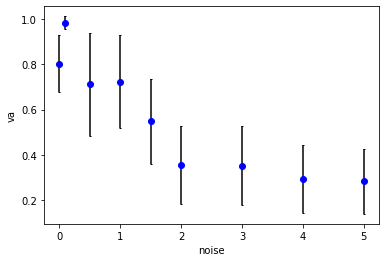

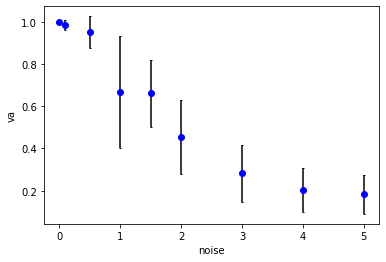

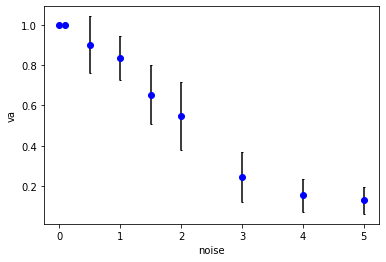

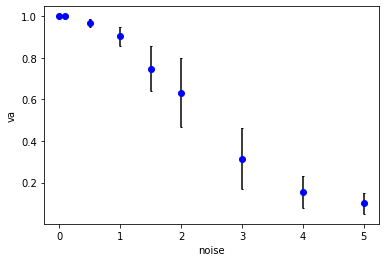

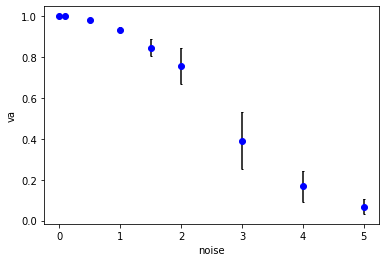

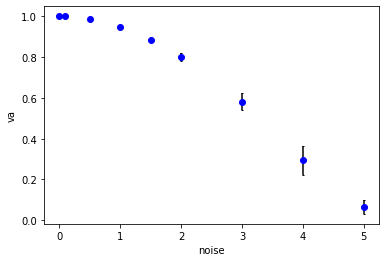

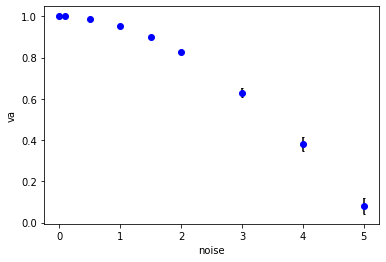

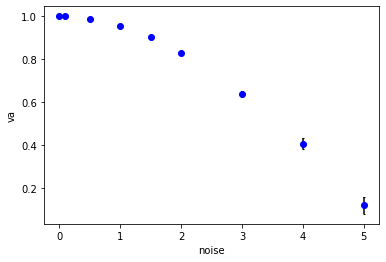

In [422]:
for i,bar_error in enumerate(bar_error_list):
    plt.errorbar(noises,bar_error["mean"],bar_error["std"],linestyle="None",  fmt="ob",capsize=1,ecolor="k")
    plt.xlabel("noise")
    plt.ylabel("va")
    plt.savefig(f"./resources/errorbarN={N[i]}")
    plt.show()

In [348]:
for i,final_df in enumerate(w_final_df):
    final_df.to_csv(f"./resources/observable_N_{N[i]}_L{L}.csv",index=False)